Your assignment is to: 

1. Calculate how many stations are in each borough
2. Calculate how many bikes are currently available in each borough

In [14]:
%matplotlib inline

import requests  
import json
from pyproj import Proj
from shapely.geometry import Point
import geopandas as gp

In [15]:
boros = gp.GeoDataFrame.from_file('nybb_15b/nybb.shp')

In [16]:
# get the bike data and convert it to a ditcionary
endpoint_url = 'http://citibikenyc.com/stations/json'
response = requests.get(endpoint_url)
data = json.loads(response.text)

In [17]:
# convert the relevant part to a geodataframe
df = gp.GeoDataFrame(data['stationBeanList'])
df.head()

,altitude,availableBikes,availableDocks,city,id,landMark,lastCommunicationTime,latitude,location,longitude,postalCode,stAddress1,stAddress2,stationName,statusKey,statusValue,testStation,totalDocks
0,,9,29,,72,,2017-04-04 11:33:33 AM,40.767272,,-73.993929,,W 52 St & 11 Ave,,W 52 St & 11 Ave,1,In Service,False,39
1,,26,6,,79,,2017-04-04 11:29:44 AM,40.719116,,-74.006667,,Franklin St & W Broadway,,Franklin St & W Broadway,1,In Service,False,33
2,,16,10,,82,,2017-04-04 11:30:06 AM,40.711174,,-74.000165,,St James Pl & Pearl St,,St James Pl & Pearl St,1,In Service,False,27
3,,56,6,,83,,2017-04-04 11:33:35 AM,40.683826,,-73.976323,,Atlantic Ave & Fort Greene Pl,,Atlantic Ave & Fort Greene Pl,1,In Service,False,62
4,,16,23,,116,,2017-04-04 11:30:05 AM,40.741776,,-74.001497,,W 17 St & 8 Ave,,W 17 St & 8 Ave,1,In Service,False,39


In [18]:
# there is one row for each bike station.  How many stations are there? 
len(df)

665

In [19]:
# in the file above, there are lon-lats, but no geometry field
# we need to set that up

s = gp.GeoSeries([Point(x, y) for x, y in zip(df['longitude'], df['latitude'])])
df['geometry'] = s
df.crs = {'init': 'epsg:4326', 'no_defs': True}
df.geometry.total_bounds

(-74.096936600000006,
 40.661063371900603,
 -73.929891100000006,
 40.804212999999997)

In [20]:
# make sure they are on the same CRS.  
# checking the bounds is a nice way of seeing this
df.to_crs(boros.crs, inplace=True)
df.geometry.total_bounds

(957370.14732175611,
 180120.27032614074,
 1003695.8507545569,
 232275.23054640222)

In [21]:
Brooklyn = boros.geometry[1]
in_br = df.geometry.within(Brooklyn)
print(sum(in_br),'stations in Brooklyn')

Bronx = boros.geometry[4]
in_brx = df.geometry.within(Bronx)
print(sum(in_brx),'stations in Bronx')

staten_island = boros.geometry[0]
in_si = df.geometry.within(staten_island)
print(sum(in_si),'stations in Staten Island')

manhattan = boros.geometry[3]
in_mn = df.geometry.within(manhattan)
print(sum(in_mn), 'stations in Manhattan')

queens = boros.geometry[2]
in_qn = df.geometry.within(queens)
print(sum(in_qn), 'stations in Queens')

237 stations in Brooklyn
0 stations in Bronx
0 stations in Staten Island
365 stations in Manhattan
13 stations in Queens


In [22]:
boros.head()

,BoroCode,BoroName,Shape_Area,Shape_Leng,geometry
0,5,Staten Island,1.623827e+09,330466.075042,(POLYGON ((970217.0223999023 145643.3322143555...
1,3,Brooklyn,1.937597e+09,741185.900596,(POLYGON ((1021176.479003906 151374.7969970703...
2,4,Queens,3.045168e+09,897040.298576,(POLYGON ((1029606.076599121 156073.8142089844...
3,1,Manhattan,6.364467e+08,358408.460709,(POLYGON ((981219.0557861328 188655.3157958984...
4,2,Bronx,1.186973e+09,464400.198868,(POLYGON ((1012821.805786133 229228.2645874023...


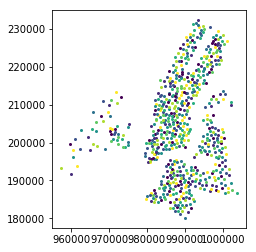

In [23]:
df.plot()

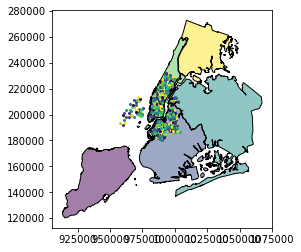

In [24]:
boros.plot(ax = df.plot())

In [25]:
Brooklyn = boros.geometry[1]
in_br = (df.geometry.within(Brooklyn))
df['within_br'] = in_br
df2 = df[df['within_br'] == True]
print(sum(df2.availableBikes),'available bikes in Brooklyn')

Bronx = boros.geometry[4]
in_brx = df.geometry.within(Bronx)
df['within_brx'] = in_brx
df2 = df[df['within_brx'] == True]
print(sum(df2.availableBikes),'available bikes in Bronx')

staten_island = boros.geometry[0]
in_si = df.geometry.within(staten_island)
df['within_si'] = in_si
df2 = df[df['within_si'] == True]
print(sum(df2.availableBikes),'available bikes in Staten Island')

manhattan = boros.geometry[3]
in_mn = df.geometry.within(manhattan)
df['within_mn'] = in_mn
df2 = df[df['within_mn'] == True]
print(sum(df2.availableBikes), 'available bikes in Manhattan')

queens = boros.geometry[2]
in_qn = df.geometry.within(queens)
df['within_qn'] = in_qn
df2 = df[df['within_qn'] == True]
print(sum(df2.availableBikes), 'available bikes in Queens')

3344 available bikes in Brooklyn
0 available bikes in Bronx
0 available bikes in Staten Island
5201 available bikes in Manhattan
153 available bikes in Queens
